<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


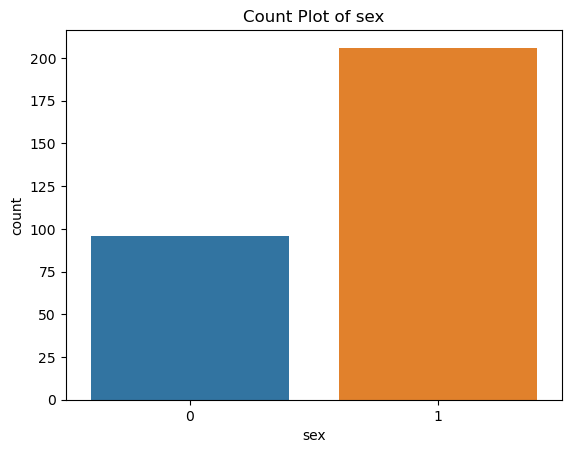

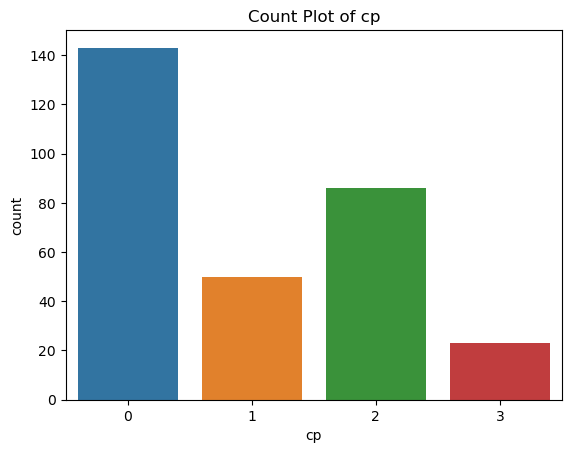

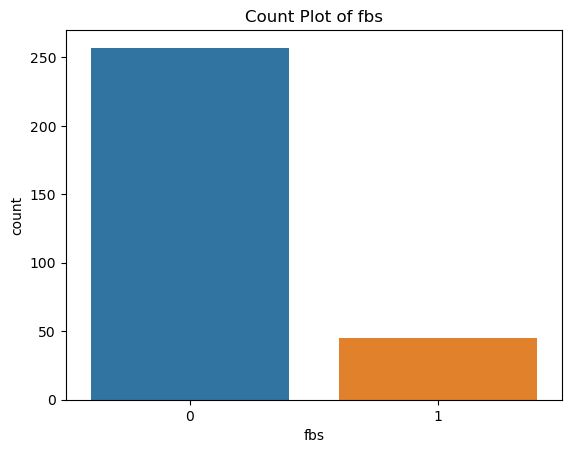

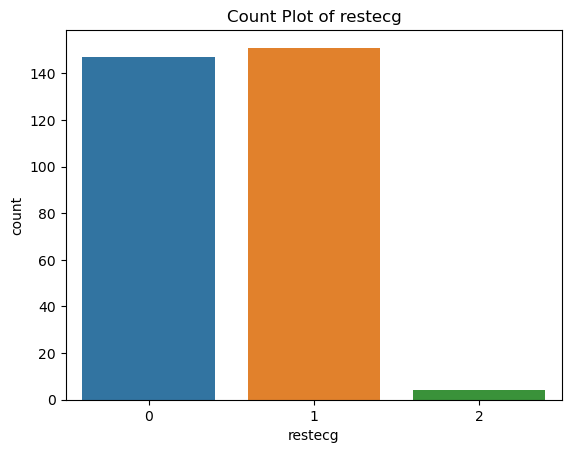

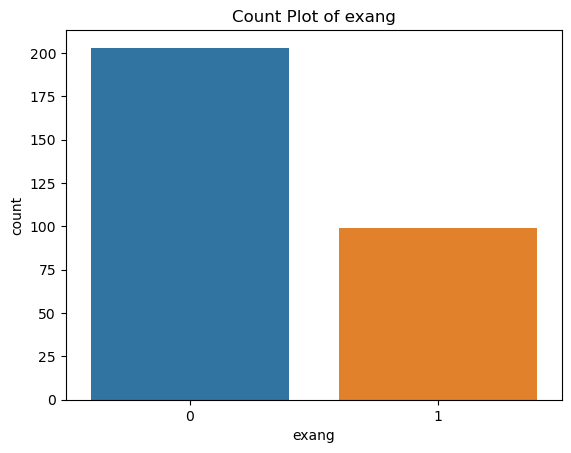

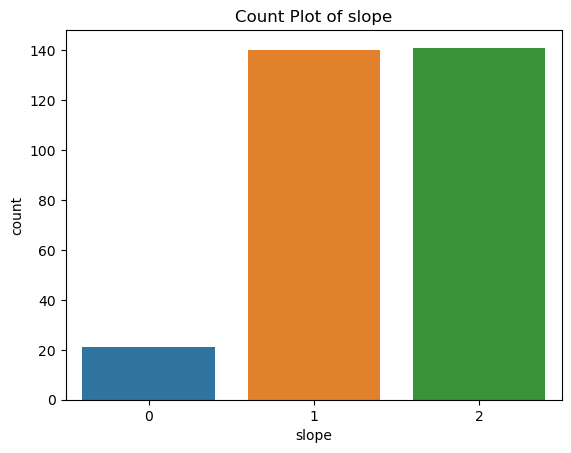

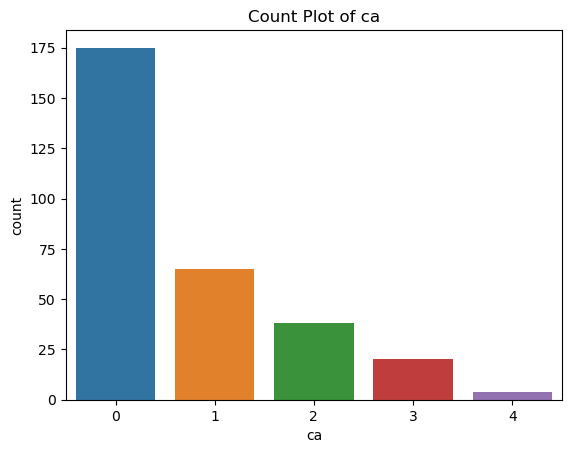

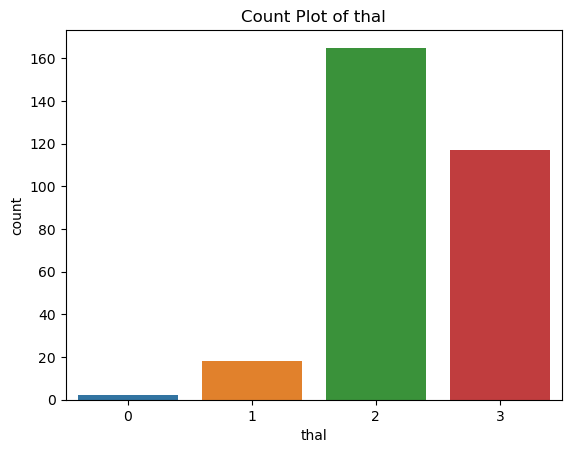

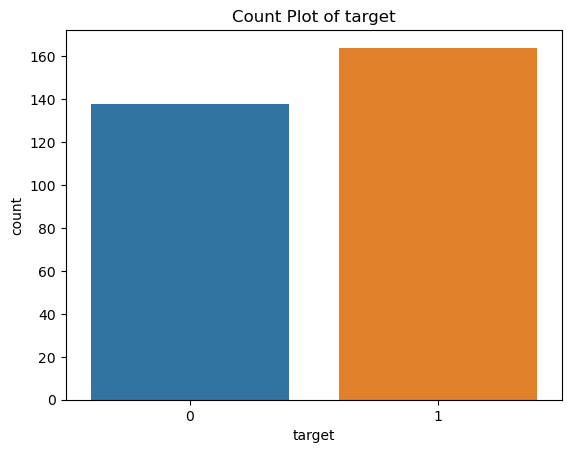

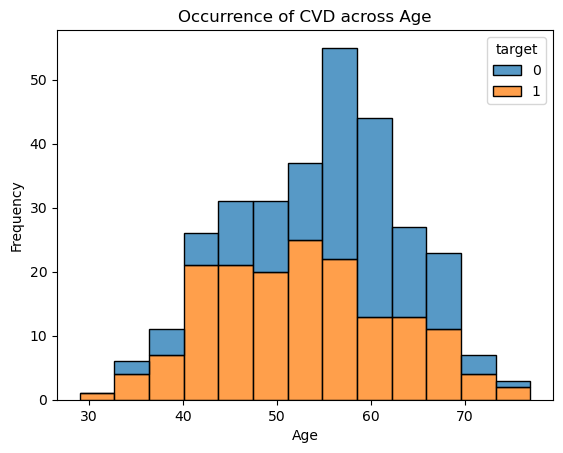

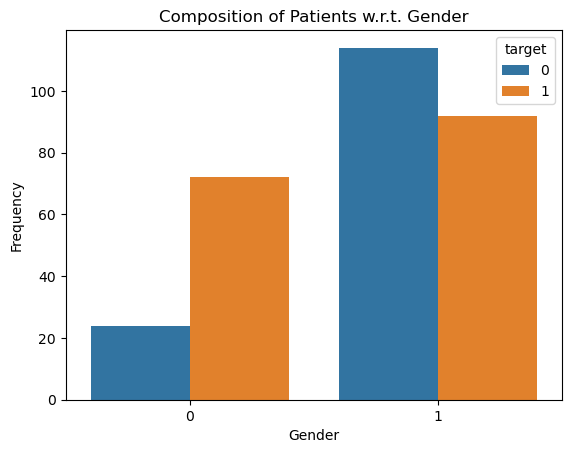

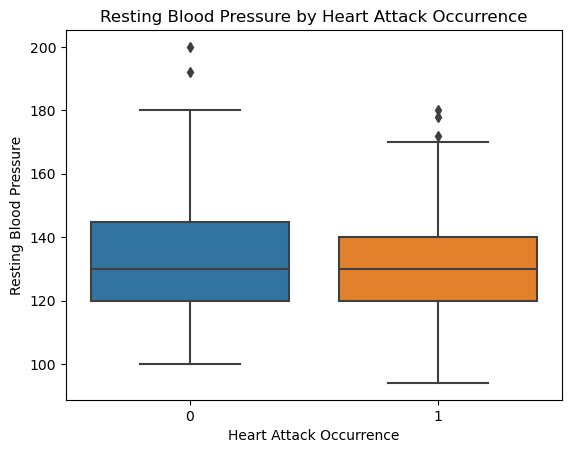

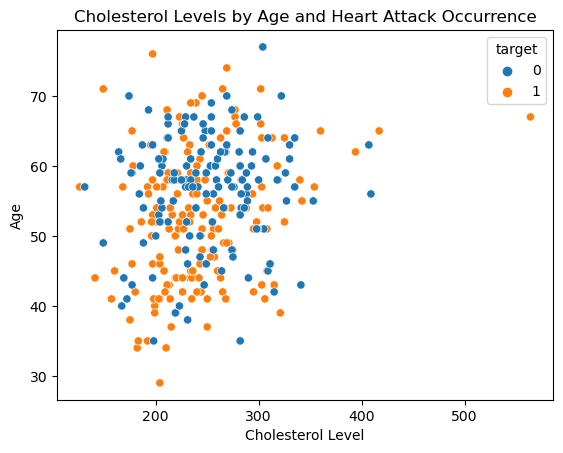

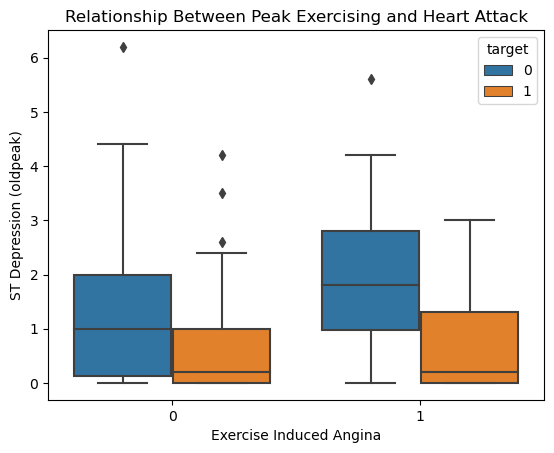

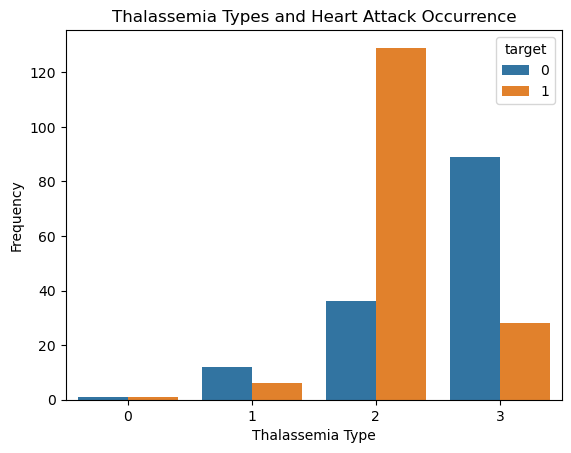

Confusion Matrix:
 [[24  5]
 [ 6 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('data.xlsx')

# Perform preliminary data inspection
structure = data.info()
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

# Remove duplicates
data = data.drop_duplicates()

# Preliminary statistical summary of the data
stat_summary = data.describe()

# Identify categorical variables
categorical_vars = data.nunique()[data.nunique() <= 10].index.tolist()

# Categorical variable count plots
for var in categorical_vars:
    sns.countplot(x=var, data=data)
    plt.title(f'Count Plot of {var}')
    plt.show()

# Occurrence of CVD across Age
sns.histplot(data=data, x="age", hue="target", multiple="stack")
plt.title('Occurrence of CVD across Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Composition of overall patients w.r.t. Gender
sns.countplot(data=data, x="sex", hue="target")
plt.title('Composition of Patients w.r.t. Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# Detect heart attack based on Resting Blood Pressure
sns.boxplot(data=data, x="target", y="trestbps")
plt.title('Resting Blood Pressure by Heart Attack Occurrence')
plt.xlabel('Heart Attack Occurrence')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Relationship between Cholesterol levels and heart attack
sns.scatterplot(data=data, x="chol", y="age", hue="target")
plt.title('Cholesterol Levels by Age and Heart Attack Occurrence')
plt.xlabel('Cholesterol Level')
plt.ylabel('Age')
plt.show()

# Relationship between peak exercising and occurrence of heart attack
sns.boxplot(data=data, x="exang", y="oldpeak", hue="target")
plt.title('Relationship Between Peak Exercising and Heart Attack')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('ST Depression (oldpeak)')
plt.show()

# Is thalassemia a major cause of CVD?
sns.countplot(data=data, x="thal", hue="target")
plt.title('Thalassemia Types and Heart Attack Occurrence')
plt.xlabel('Thalassemia Type')
plt.ylabel('Frequency')
plt.show()

# For the other factors and the pair plot, consider running them separately or on a reduced dataset.

# Building a baseline logistic regression model
X = data.drop('target', axis=1)
y = data['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)
